### Agent-Lab: Adaptive RAG Agent

Objective of this notebook is evaluating and adapting the implementation of [Adaptive RAG Agent](https://langchain-ai.github.io/langgraph/tutorials/rag/langgraph_adaptive_rag/).


In [1]:
%%capture
import json
import os
import nest_asyncio
from dotenv import load_dotenv
from IPython.display import Markdown, display
from notebooks import experiment_utils
from app.core.container import Container
from app.interface.api.messages.schema import MessageRequest

os.chdir("..")
load_dotenv()
nest_asyncio.apply()

# start dependency injection container
container = Container()
container.init_resources()
container.wire(modules=[__name__])

# get checkpointer instance
graph_persistence_factory = container.graph_persistence_factory()
checkpointer = graph_persistence_factory.build_checkpoint_saver()

---

## XAI Adaptive RAG Agent

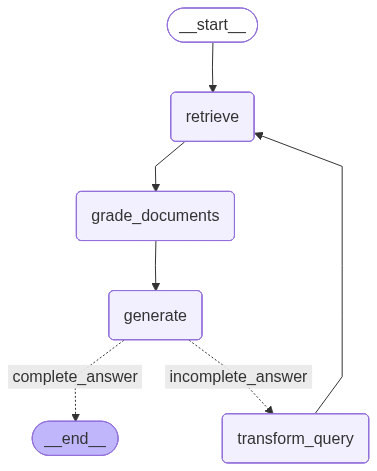

In [2]:
# Create Workflow
xai_agent = experiment_utils.create_xai_agent(
    agent_type="adaptive_rag", llm_tag="grok-code-fast", api_key=os.getenv("XAI_API_KEY")
)
xai_adaptive_rag_agent = container.adaptive_rag_agent()
xai_workflow_builder = xai_adaptive_rag_agent.get_workflow_builder(xai_agent["id"])
xai_workflow = xai_workflow_builder.compile(checkpointer=checkpointer)

experiment_utils.print_graph(xai_workflow)

In [3]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=xai_agent["id"],
)

inputs = xai_adaptive_rag_agent.get_input_params(message, schema="public")
config = xai_adaptive_rag_agent.get_config(xai_agent["id"])
result = xai_workflow.invoke(inputs, config)
ai_message_content, workflow_state = xai_adaptive_rag_agent.format_response(result)

In [4]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

According to Sun Tzu's teachings on warfare, the pinnacle of excellence lies in supreme generalship: breaking the enemy's resistance without fighting. This is accomplished by secretly planning, moving surreptitiously, and foiling the enemy's intentions to win the day without shedding a drop of blood, as exemplified by Moltke's bloodless victory at Sedan.

In [5]:
display(
    Markdown(
        f"**Workflow state:**\n```json\n{json.dumps(workflow_state, indent=2)}\n```"
    )
)

**Workflow state:**
```json
{
  "agent_id": "71da4c09-cc9a-48c1-949e-732c1dd57c47",
  "query": "What is the pinnacle of excellence?",
  "collection_name": "static_document_data_ollama_embeddings",
  "generation": "According to Sun Tzu's teachings on warfare, the pinnacle of excellence lies in supreme generalship: breaking the enemy's resistance without fighting. This is accomplished by secretly planning, moving surreptitiously, and foiling the enemy's intentions to win the day without shedding a drop of blood, as exemplified by Moltke's bloodless victory at Sedan.",
  "connection": "The query asks for the pinnacle of excellence, and the provided context from Sun Tzu's The Art of War defines supreme excellence in strategy as breaking the enemy's resistance without fighting, achieved through subtle planning and thwarting plans without bloodshed.",
  "documents": [
    "Hence to fight and conquer in all your battles is not supreme excellence; supreme excellence consists in breaking the enemy\u2019s resistance without fighting.\n\n[Here again, no modern strategist but will approve the words of the old Chinese general. Moltke\u2019s greatest triumph, the capitulation of the huge French army at Sedan, was won practically without bloodshed.]\n\nThus the highest form of generalship is to baulk the enemy\u2019s plans;",
    "Hence to fight and conquer in all your battles is not supreme excellence; supreme excellence consists in breaking the enemy\u2019s resistance without fighting.\n\n[Here again, no modern strategist but will approve the words of the old Chinese general. Moltke\u2019s greatest triumph, the capitulation of the huge French army at Sedan, was won practically without bloodshed.]\n\nThus the highest form of generalship is to baulk the enemy\u2019s plans;",
    "Neither is it the acme of excellence if you fight and conquer and the whole Empire says, \"Well done!\"\n\n[True excellence being, as Tu Mu says: \"To plan secretly, to move surreptitiously, to foil the enemy\u2019s intentions and balk his schemes, so that at last the day may be won without shedding a drop of blood.\" Sun Tz\u016d reserves his approbation for things that\n\n\"the world\u2019s coarse thumb And finger fail to plumb.\"\n\nTo lift an autumn hair is no sign of great strength;"
  ]
}
```

In [6]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Can you repeat my previous question and answer it again but this time in dutch?",
    agent_id=xai_agent["id"],
)

inputs = xai_adaptive_rag_agent.get_input_params(message, schema="public")
config = xai_adaptive_rag_agent.get_config(xai_agent["id"])
result = xai_workflow.invoke(inputs, config)
ai_message_content, workflow_state = xai_adaptive_rag_agent.format_response(result)

In [7]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Vorige vraag: Wat is het toppunt van uitmuntendheid?

Antwoord: Volgens de leer van Sun Tzu over oorlogvoering ligt het toppunt van uitmuntendheid in de hoogste generale: de weerstand van de vijand breken zonder te vechten. Dit wordt bereikt door heimelijk te plannen, stiekem te bewegen en de bedoelingen van de vijand te dwarsbomen om de dag te winnen zonder een druppel bloed te vergieten, zoals geïllustreerd door Moltke's bloedloze overwinning bij Sedan.

In [8]:
display(
    Markdown(
        f"**Workflow state:**\n```json\n{json.dumps(workflow_state, indent=2)}\n```"
    )
)

**Workflow state:**
```json
{
  "agent_id": "71da4c09-cc9a-48c1-949e-732c1dd57c47",
  "query": "Can you repeat my previous question and answer it again but this time in dutch?",
  "collection_name": "static_document_data_ollama_embeddings",
  "generation": "Vorige vraag: Wat is het toppunt van uitmuntendheid?\n\nAntwoord: Volgens de leer van Sun Tzu over oorlogvoering ligt het toppunt van uitmuntendheid in de hoogste generale: de weerstand van de vijand breken zonder te vechten. Dit wordt bereikt door heimelijk te plannen, stiekem te bewegen en de bedoelingen van de vijand te dwarsbomen om de dag te winnen zonder een druppel bloed te vergieten, zoals ge\u00efllustreerd door Moltke's bloedloze overwinning bij Sedan.",
  "connection": "The user is asking to repeat the previous question \"What is the pinnacle of excellence?\" and provide the answer again, but in Dutch, based on the previous interaction where the answer was derived from Sun Tzu's teachings.",
  "documents": []
}
```

In [9]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen maar dit keer in het Portugees?",
    agent_id=xai_agent["id"],
)

inputs = xai_adaptive_rag_agent.get_input_params(message, schema="public")
config = xai_adaptive_rag_agent.get_config(xai_agent["id"])
result = xai_workflow.invoke(inputs, config)
ai_message_content, workflow_state = xai_adaptive_rag_agent.format_response(result)

In [10]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Pergunta anterior: Qual é o pináculo da excelência?

Resposta: Segundo os ensinamentos de Sun Tzu sobre a guerra, o pináculo da excelência reside na suprema generalidade: quebrar a resistência do inimigo sem lutar. Isso é alcançado através do planejamento secreto, movimento furtivo e frustração das intenções do inimigo para vencer o dia sem derramar uma gota de sangue, como exemplificado pela vitória sem sangue de Moltke em Sedan.

In [11]:
display(
    Markdown(
        f"**Workflow state:**\n```json\n{json.dumps(workflow_state, indent=2)}\n```"
    )
)

**Workflow state:**
```json
{
  "agent_id": "71da4c09-cc9a-48c1-949e-732c1dd57c47",
  "query": "Kun je mijn vorige vraag en jouw antwoord herhalen maar dit keer in het Portugees?",
  "collection_name": "static_document_data_ollama_embeddings",
  "generation": "Pergunta anterior: Qual \u00e9 o pin\u00e1culo da excel\u00eancia?\n\nResposta: Segundo os ensinamentos de Sun Tzu sobre a guerra, o pin\u00e1culo da excel\u00eancia reside na suprema generalidade: quebrar a resist\u00eancia do inimigo sem lutar. Isso \u00e9 alcan\u00e7ado atrav\u00e9s do planejamento secreto, movimento furtivo e frustra\u00e7\u00e3o das inten\u00e7\u00f5es do inimigo para vencer o dia sem derramar uma gota de sangue, como exemplificado pela vit\u00f3ria sem sangue de Moltke em Sedan.",
  "connection": "The user is requesting a repetition of the previous question \"What is the pinnacle of excellence?\" and the AI's answer based on Sun Tzu, but translated into Portuguese, following the pattern from the previous interaction where it was done in Dutch.",
  "documents": []
}
```

---
## OpenAI Adaptive RAG Agent

In [28]:
# Create Workflow
openai_agent = experiment_utils.create_openai_agent(
    agent_type="adaptive_rag",
    llm_tag="gpt-5-nano",
    api_key=os.getenv("OPENAI_API_KEY")
)
openai_adaptive_rag_agent = container.adaptive_rag_agent()
openai_workflow_builder = openai_adaptive_rag_agent.get_workflow_builder(openai_agent["id"])
openai_workflow = openai_workflow_builder.compile(checkpointer=checkpointer)

In [29]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=openai_agent["id"],
)

inputs = openai_adaptive_rag_agent.get_input_params(message, schema="public")
config = openai_adaptive_rag_agent.get_config(openai_agent["id"])
result = openai_workflow.invoke(inputs, config)
ai_message_content, workflow_state = openai_adaptive_rag_agent.format_response(result)

In [30]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Supreme excellence consists in breaking the enemy’s resistance without fighting (winning without warfare); the highest form of generalship is to baulk the enemy’s plans.

In [31]:
display(
    Markdown(
        f"**Workflow state:**\n```json\n{json.dumps(workflow_state, indent=2)}\n```"
    )
)

**Workflow state:**
```json
{
  "agent_id": "fa0ab8e3-1698-433e-96f7-b0eb913f238f",
  "query": "What is the pinnacle of excellence?",
  "collection_name": "static_document_data_openai_embeddings",
  "generation": "Supreme excellence consists in breaking the enemy\u2019s resistance without fighting (winning without warfare); the highest form of generalship is to baulk the enemy\u2019s plans.",
  "connection": "From the text, the pinnacle of excellence is to win without fighting, i.e., to break the enemy\u2019s resistance without engaging in battle.",
  "documents": [
    "Neither is it the acme of excellence if you fight and conquer and the whole Empire says, \"Well done!\"\n\n[True excellence being, as Tu Mu says: \"To plan secretly, to move surreptitiously, to foil the enemy\u2019s intentions and balk his schemes, so that at last the day may be won without shedding a drop of blood.\" Sun Tz\u016d reserves his approbation for things that\n\n\"the world\u2019s coarse thumb And finger fail to plumb.\"\n\nTo lift an autumn hair is no sign of great strength;",
    "Thus on the one hand we have ability to protect ourselves; on the other, a victory that is complete.\n\nTo see victory only when it is within the ken of the common herd is not the acme of excellence.",
    "Hence to fight and conquer in all your battles is not supreme excellence; supreme excellence consists in breaking the enemy\u2019s resistance without fighting.\n\n[Here again, no modern strategist but will approve the words of the old Chinese general. Moltke\u2019s greatest triumph, the capitulation of the huge French army at Sedan, was won practically without bloodshed.]\n\nThus the highest form of generalship is to baulk the enemy\u2019s plans;"
  ]
}
```

In [32]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Can you repeat my previous question and answer it again but this time in dutch?",
    agent_id=openai_agent["id"],
)

inputs = openai_adaptive_rag_agent.get_input_params(message, schema="public")
config = openai_adaptive_rag_agent.get_config(openai_agent["id"])
result = openai_workflow.invoke(inputs, config)
ai_message_content, workflow_state = openai_adaptive_rag_agent.format_response(result)

In [33]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Vraag: Wat is het toppunt van uitmuntendheid? Antwoord: Het allerhoogste uitmuntendheid bestaat erin de weerstand van de vijand te doorbreken zonder te vechten (winnen zonder oorlog); de hoogste vorm van legeraanvoerderschap is om de plannen van de vijand dwars te bomen.

In [ ]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen maar dit keer in het Portugees?",
    agent_id=openai_agent["id"],
)

inputs = openai_adaptive_rag_agent.get_input_params(message, schema="public")
config = openai_adaptive_rag_agent.get_config(openai_agent["id"])
result = openai_workflow.invoke(inputs, config)
ai_message_content, workflow_state = openai_adaptive_rag_agent.format_response(result)

In [ ]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

---
### Anthropic Adaptive RAG Agent

In [20]:
# Create Workflow
anthropic_agent = experiment_utils.create_anthropic_agent(
    agent_type="adaptive_rag", llm_tag="claude-sonnet-4-20250514", api_key=os.getenv("ANTHROPIC_API_KEY")
)
anthropic_adaptive_rag_agent = container.adaptive_rag_agent()
anthropic_workflow_builder = anthropic_adaptive_rag_agent.get_workflow_builder(anthropic_agent["id"])
anthropic_workflow = anthropic_workflow_builder.compile(checkpointer=checkpointer)

In [21]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=anthropic_agent["id"],
)

inputs = anthropic_adaptive_rag_agent.get_input_params(message, schema="public")
config = anthropic_adaptive_rag_agent.get_config(anthropic_agent["id"])
result = anthropic_workflow.invoke(inputs, config)
ai_message_content, workflow_state = anthropic_adaptive_rag_agent.format_response(result)

In [22]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

According to the ancient Chinese strategist Sun Tzu, the pinnacle of excellence is not winning through battle, but rather achieving victory without fighting at all. Supreme excellence consists in "breaking the enemy's resistance without fighting" and "baulking the enemy's plans" through strategic planning and maneuvering. True excellence involves planning secretly, moving surreptitiously, and foiling the enemy's intentions so completely that victory is achieved without shedding blood. This philosophy suggests that the highest form of skill is achieving one's objectives through intelligence, strategy, and psychological influence rather than through direct confrontation or force.

In [23]:
display(
    Markdown(
        f"**Workflow state:**\n```json\n{json.dumps(workflow_state, indent=2)}\n```"
    )
)

**Workflow state:**
```json
{
  "agent_id": "a58c1a04-33f0-4170-909e-1ab707674350",
  "query": "What is the pinnacle of excellence?",
  "collection_name": "static_document_data_ollama_embeddings",
  "generation": "According to the ancient Chinese strategist Sun Tzu, the pinnacle of excellence is not winning through battle, but rather achieving victory without fighting at all. Supreme excellence consists in \"breaking the enemy's resistance without fighting\" and \"baulking the enemy's plans\" through strategic planning and maneuvering. True excellence involves planning secretly, moving surreptitiously, and foiling the enemy's intentions so completely that victory is achieved without shedding blood. This philosophy suggests that the highest form of skill is achieving one's objectives through intelligence, strategy, and psychological influence rather than through direct confrontation or force.",
  "connection": "The context provides Sun Tzu's philosophy from \"The Art of War\" which directly addresses what constitutes the pinnacle or \"supreme excellence\" in strategic thinking.",
  "documents": [
    "Hence to fight and conquer in all your battles is not supreme excellence; supreme excellence consists in breaking the enemy\u2019s resistance without fighting.\n\n[Here again, no modern strategist but will approve the words of the old Chinese general. Moltke\u2019s greatest triumph, the capitulation of the huge French army at Sedan, was won practically without bloodshed.]\n\nThus the highest form of generalship is to baulk the enemy\u2019s plans;",
    "Hence to fight and conquer in all your battles is not supreme excellence; supreme excellence consists in breaking the enemy\u2019s resistance without fighting.\n\n[Here again, no modern strategist but will approve the words of the old Chinese general. Moltke\u2019s greatest triumph, the capitulation of the huge French army at Sedan, was won practically without bloodshed.]\n\nThus the highest form of generalship is to baulk the enemy\u2019s plans;",
    "Neither is it the acme of excellence if you fight and conquer and the whole Empire says, \"Well done!\"\n\n[True excellence being, as Tu Mu says: \"To plan secretly, to move surreptitiously, to foil the enemy\u2019s intentions and balk his schemes, so that at last the day may be won without shedding a drop of blood.\" Sun Tz\u016d reserves his approbation for things that\n\n\"the world\u2019s coarse thumb And finger fail to plumb.\"\n\nTo lift an autumn hair is no sign of great strength;"
  ]
}
```

In [24]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Can you repeat my previous question and answer it again but this time in dutch?",
    agent_id=anthropic_agent["id"],
)

inputs = anthropic_adaptive_rag_agent.get_input_params(message, schema="public")
config = anthropic_adaptive_rag_agent.get_config(anthropic_agent["id"])
result = anthropic_workflow.invoke(inputs, config)
ai_message_content, workflow_state = anthropic_adaptive_rag_agent.format_response(result)

In [25]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Ik heb al een Nederlandse vertaling gegeven in mijn vorige reactie. Hier was het nogmaals:

Uw vorige vraag was: "Wat is het toppunt van excellentie?"

Volgens de oude Chinese strateeg Sun Tzu is het toppunt van excellentie niet het winnen door middel van gevechten, maar eerder het behalen van overwinning zonder überhaupt te vechten. Supreme excellentie bestaat uit "het breken van de weerstand van de vijand zonder te vechten" en "het dwarsbomen van de plannen van de vijand" door strategische planning en manoeuvreren. Ware excellentie houdt in dat men heimelijk plant, sluipend beweegt, en de intenties van de vijand zo volledig dwarsboomt dat overwinning wordt behaald zonder bloedvergieten. Deze filosofie suggereert dat de hoogste vorm van vaardigheid het bereiken van iemands doelstellingen is door middel van intelligentie, strategie en psychologische invloed, in plaats van door directe confrontatie of geweld.

In [26]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen maar dit keer in het Portugees?",
    agent_id=anthropic_agent["id"],
)

inputs = anthropic_adaptive_rag_agent.get_input_params(message, schema="public")
config = anthropic_adaptive_rag_agent.get_config(anthropic_agent["id"])
result = anthropic_workflow.invoke(inputs, config)
ai_message_content, workflow_state = anthropic_adaptive_rag_agent.format_response(result)

In [27]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Based on the previous conversation, here is the Portuguese translation:

**Pergunta:** "Qual é o auge da excelência?"

**Resposta:** De acordo com Sun Tzu em "A Arte da Guerra", a excelência suprema consiste em quebrar a resistência do inimigo sem lutar. A verdadeira excelência envolve:

- Quebrar a resistência inimiga sem combate
- Planejamento estratégico e manobrabilidade  
- Planejamento secreto e movimento sub-reptício
- Usar inteligência, estratégia e influência psicológica em vez de confronto direto ou força

Sun Tzu enfatiza que o mais alto nível de habilidade é alcançar objetivos através da sabedoria e estratégia, não pela força.